This is a part with graphs for my diploma

In [1]:
from sympy import*
from sympy import plot
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [2]:
I, I1, Delta_w, w, w1, w_r, theta = symbols('I, I1, Delta_w, w, w1, w_r, theta')
k_w, lambda_w, L, c, gamma_bar = symbols('k_w, lambda_w, L, c, gamma_bar')

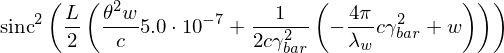

In [3]:
#c = 299792458#m/s
#L = 2.5 #m
#lambda_w = 20 * 1e-3#m undulator length
#gamma_bar = 6000#Ebeam/m_e
k_w = 2*pi/lambda_w
w_r = 2*c*gamma_bar**2*k_w#resonant frequency
Delta_w = w - w_r

I = (sinc((k_w*(w - w_r)/w_r + w*(theta*1e-3)**2/2/c)*L/2))**2

I

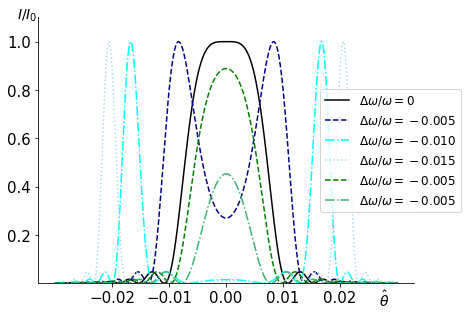

In [10]:
c = 299792458#m/s
lambda_w = 20 * 1e-3#m undulator length
gamma_bar = 6000#Ebeam/m_e
k_w = 2*np.pi/lambda_w
w_r = 2*c*gamma_bar**2*k_w#resonant frequency

def Intens(theta, w, L):
    return np.sinc(L*(1.66782047599076e-15*theta**2*w + 4.63283465552989e-17*w - 100.0*np.pi)/2)**2

theta = np.arange(-0.03,0.03, 0.00001)
L = 1.5
plt.figure(figsize=(1.5*4,1.5*3))
w = w_r
plt.plot(theta, Intens(theta, w, L), color='black', label='$\Delta\omega/\omega = 0$')

w = w_r*(1 - 0.0025)
plt.plot(theta, Intens(theta, w, L), color='darkblue', linestyle='--', label='$\Delta\omega/\omega = -0.005$')

w = w_r*(1 - 0.01)
plt.plot(theta, Intens(theta, w, L), color='aqua', linestyle='-.', label='$\Delta\omega/\omega = -0.010$')

w = w_r*(1 - 0.015)
plt.plot(theta, Intens(theta, w, L), color='lightblue', linestyle=':', label='$\Delta\omega/\omega = -0.015$')

w = w_r*(1 + 0.0008)
plt.plot(theta, Intens(theta, w, L), color='green', linestyle='--', label='$\Delta\omega/\omega = -0.005$')

w = w_r*(1 + 0.002)
plt.plot(theta, Intens(theta, w, L), color='mediumseagreen', linestyle='-.', label='$\Delta\omega/\omega = -0.005$')


plt.xlabel(r'$\hat{\theta}$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$I/I_0$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

plt.xticks([-0.02, -0.01, 0, 0.01, 0.02])
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2, 0.4,0.6,0.8, 1.0])
        #  [r'$-1$', r'$0$', r'$+1$'])
        
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.92, -0.02)
ax.yaxis.set_label_coords(-0.03, 0.98)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.01))

leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.2
bb.x0 += 0.3
bb.x1 += 0.14
bb.y0 += 0.
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/angle.pdf', bbox_inches='tight')
plt.show()

The same graphs in normilised units $\hat{C} = CL = 2\pi N\cfrac{\Delta\omega}{\omega_r}$ and $\hat{\theta} = \theta\sqrt{\cfrac{\omega L}{c}}$

Field distribution is: $\hat{E}_{\bot} = e^{i\Phi}
		\cfrac{\sin\bigg(\cfrac{\hat{C}}{2} + 
		\cfrac{\hat{\theta}^2}{4}\bigg)}{\cfrac{\hat{C}}{2} + 
		\cfrac{\hat{\theta}^2}{4}}$

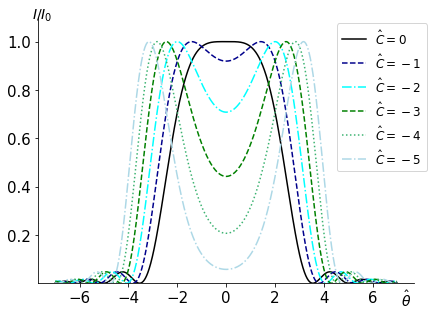

In [26]:
def Intens(theta, C):
    return (np.sin(C/2 + theta**2/4)/(C/2 + theta**2/4))**2

theta = np.arange(-7, 7, 0.01)

plt.figure(figsize=(1.5*4,1.5*3))
C = 0 
plt.plot(theta, Intens(theta, C), color='black', label=r'$\hat{C} =  0$')

C = -1
plt.plot(theta, Intens(theta, C), color='darkblue', linestyle='--', label=r'$\hat{C} = -1$')

C = -2
plt.plot(theta, Intens(theta, C), color='aqua', linestyle='-.', label=r'$\hat{C} = -2$')

C = -3
plt.plot(theta, Intens(theta, C), color='green', linestyle='--', label=r'$\hat{C} = -3$')

C = -4
plt.plot(theta, Intens(theta, C), color='mediumseagreen', linestyle=':', label=r'$\hat{C} = -4$')

C = -5
plt.plot(theta, Intens(theta, C), color='lightblue', linestyle='-.', label=r'$\hat{C} = -5$')
#aqua

plt.xlabel(r'$\hat{\theta}$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$I/I_0$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

#plt.xticks([-0.02, -0.01, 0, 0.01, 0.02])
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2, 0.4,0.6,0.8, 1.0])
        #  [r'$-1$', r'$0$', r'$+1$'])
        
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.98, -0.02)
ax.yaxis.set_label_coords(0.01, 0.98)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.01))

leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.2
bb.x0 += 0.1
bb.x1 += 0.05
bb.y0 += 0.3
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/angleC_neg.pdf', bbox_inches='tight')
plt.show()

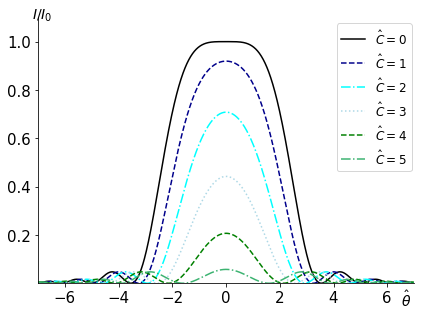

In [24]:
plt.figure(figsize=(1.5*4,1.5*3))
C = 0 
plt.plot(theta, Intens(theta, C), color='black', label=r'$\hat{C} =  0$')

C = 1
plt.plot(theta, Intens(theta, C), color='darkblue', linestyle='--', label=r'$\hat{C} = 1$')

C = 2
plt.plot(theta, Intens(theta, C), color='aqua', linestyle='-.', label=r'$\hat{C} = 2$')

C = 3
plt.plot(theta, Intens(theta, C), color='lightblue', linestyle=':', label=r'$\hat{C} = 3$')

C = 4
plt.plot(theta, Intens(theta, C), color='green', linestyle='--', label=r'$\hat{C} = 4$')

C = 5
plt.plot(theta, Intens(theta, C), color='mediumseagreen', linestyle='-.', label=r'$\hat{C} = 5$')


plt.xlabel(r'$\hat{\theta}$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$I/I_0$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

#plt.xticks([-0.02, -0.01, 0, 0.01, 0.02])
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2, 0.4,0.6,0.8, 1.0])
        #  [r'$-1$', r'$0$', r'$+1$'])
        
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.98, -0.02)
ax.yaxis.set_label_coords(0.01, 0.98)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.01))

leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.2
bb.x0 += 0.1
bb.x1 += 0.01
bb.y0 += 0.
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.ylim(0, 1.1)
plt.xlim(-7, 7)
plt.tight_layout()
plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/angleC_pos.pdf', bbox_inches='tight')
plt.show()